<a href="https://colab.research.google.com/github/artem56/PoitionTask/blob/master/%22OpenCVPractic_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
 
 

 

 
imageFrame1 = cv2.imread("/content/манометры/0001.png")
(w, h) = imageFrame1.shape[:2]
imageFrame = cv2.resize(imageFrame1, (700, 500))
#imageFrame=cv2.rotate(imageFrame2,cv2.ROTATE_90_CLOCKWISE)
hsvFrame = cv2.cvtColor(imageFrame, cv2.COLOR_BGR2HSV)
 
lower = np.array([61,0,193], np.uint8)
upper = np.array([255, 255, 255], np.uint8)
mask = cv2.inRange(hsvFrame, lower, upper)
cv2_imshow( hsvFrame)
 
kernal = np.ones((5, 5), "uint8")
 
mask = cv2.dilate(mask, kernal)
res = cv2.bitwise_and(imageFrame, imageFrame, mask=mask)
cv2_imshow( mask)
 
#поиск контура вольтметра
contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
 
for pic, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if (area > 20000 and area<60000):
            x, y, w, h = cv2.boundingRect(contour)
            #print(x, y) #203 124
            #print(w,h)  #270 188
            #imageFrame = cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (255, 0, 0), 1)
            #cv2.putText(imageFrame, "VOLTMETER", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 0, 0))
            current=imageFrame[124+20:124+188-7, 203+5:203+270-5]
            #current = imageFrame[ + 20:y + h - 7, x + 5:x + w - 5]
            #cv2.imwrite("volt_current.jpg", current)
            print("3 - Only Voltmeter")
            cv2_imshow( current)
 
            #создание окна эллипса
            imageEllipse = np.zeros((188-27, 270-10, 3), np.uint8)
            imageEllipse[:] = (255,255,255)
            WHITE = (255, 255, 255)
            BLACK = (0, 0, 0)
            height, width = imageEllipse.shape[0:2]
 
            #дуга 205-270 градусов (чтобы не налазила на шкалу)
            radius1_1 = 95
            radius1_2 = 90
            center1 = (int(width/2), int(height/2+27)+80)
            axes1 = (radius1_1, radius1_2)
            angle1 = 0
            startAngle1 = 205
            endAngle1 = 270
            thickness1 = 2
 
            #дуга 270-340 градусов
            radius2_1 = 85
            radius2_2 = 90
            center2 = (int(width/2), int(height/2+27)+80)
            axes2 = (radius2_1, radius2_2)
            angle2 = 0
            startAngle2 = 270
            endAngle2 = 340
            thickness2 = 2 # When thickness == -1 -> Fill shape
 
            cv2.ellipse(imageEllipse, center1, axes1, angle1, startAngle1, endAngle1, BLACK, thickness1)
            cv2.ellipse(imageEllipse, center2, axes2, angle2, startAngle2, endAngle2, BLACK, thickness2)
 
            imageEllipse1 = cv2.cvtColor(imageEllipse, cv2.COLOR_BGR2GRAY)
 
            imageEllipse2 = cv2.threshold(imageEllipse1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
            print('4 - ellipse mask')
            cv2_imshow( imageEllipse2)
            print('ellipse1')
            cv2_imshow( imageEllipse1)
 
            mask = np.array(imageEllipse2)
            mask1 = np.array(imageEllipse1)
            img = current.copy()
            img = cv2.GaussianBlur(img, (3, 3), 0)
            edge = cv2.Canny(img, 35,15)
            print('5 - Canny')
            cv2_imshow( edge)
            res1 = cv2.bitwise_and(current, current, mask=mask1)
 
            res = cv2.bitwise_and(edge, edge, mask=mask)
            print('7 - Res')
            cv2_imshow( res)
 
            contours, hierarchy = cv2.findContours(res.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            for c in contours:
                if (h>=2 and w>2):
                    x, y, w, h = cv2.boundingRect(c)
                    cv2.rectangle(imageFrame, (x, y), (x + w, y + h), (0, 0, 255), 3)
                    theta = 180/math.pi*math.atan((y-(height/2+27+120))/(x-(int(width/2))))
                    theta0 = 45
                    if theta<theta0:
                        volt = 0
                    if volt < 0:
                        volt = 0
                    volt_prev = volt
                    volt = (theta - theta0) / 0.4
                    delta = volt - volt_prev
                    if delta <=2 and volt>0:
                        tec_volt = int(volt)
                        print(tec_volt)
                        cv2.putText(res1, str(tec_volt), (20, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.8,  (255, 0, 0), 2)
                        print('6 - Voltmeter+ellipse')
            cv2_imshow( res1)
            
    
        



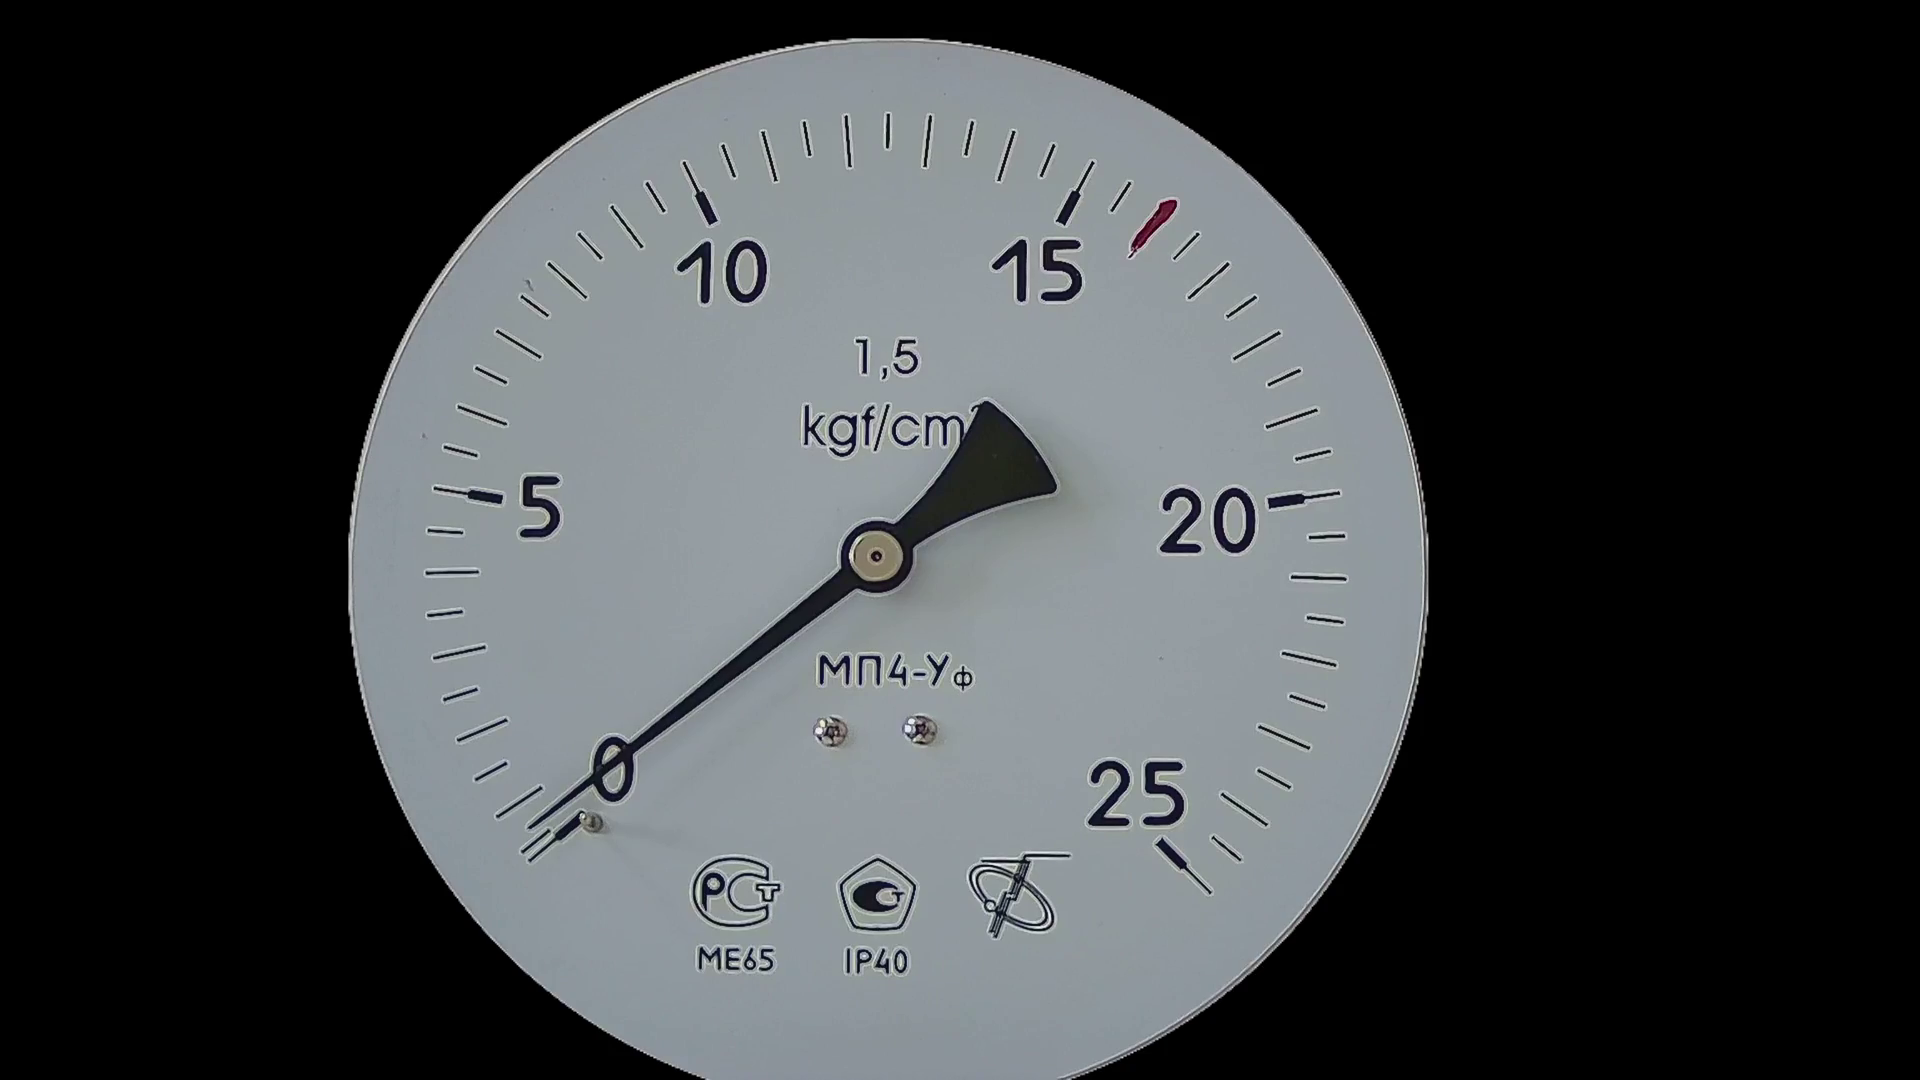

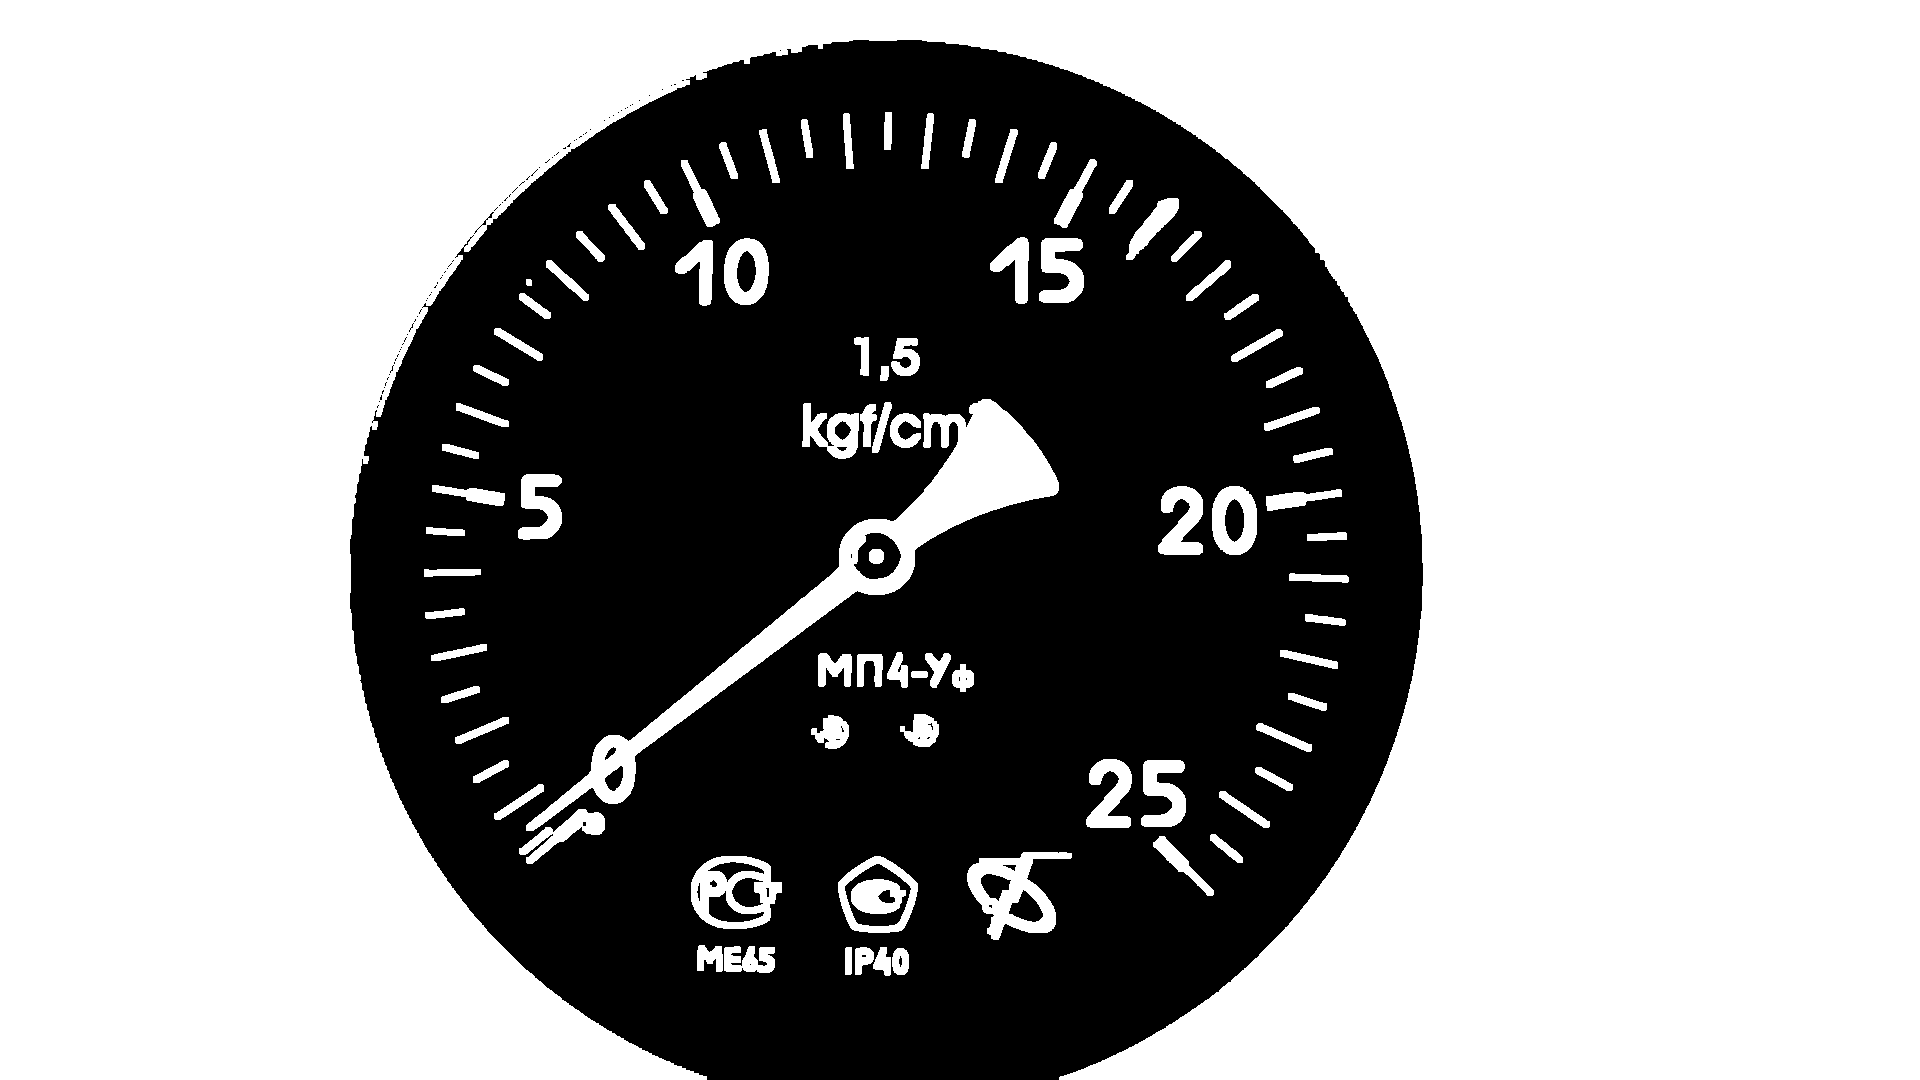

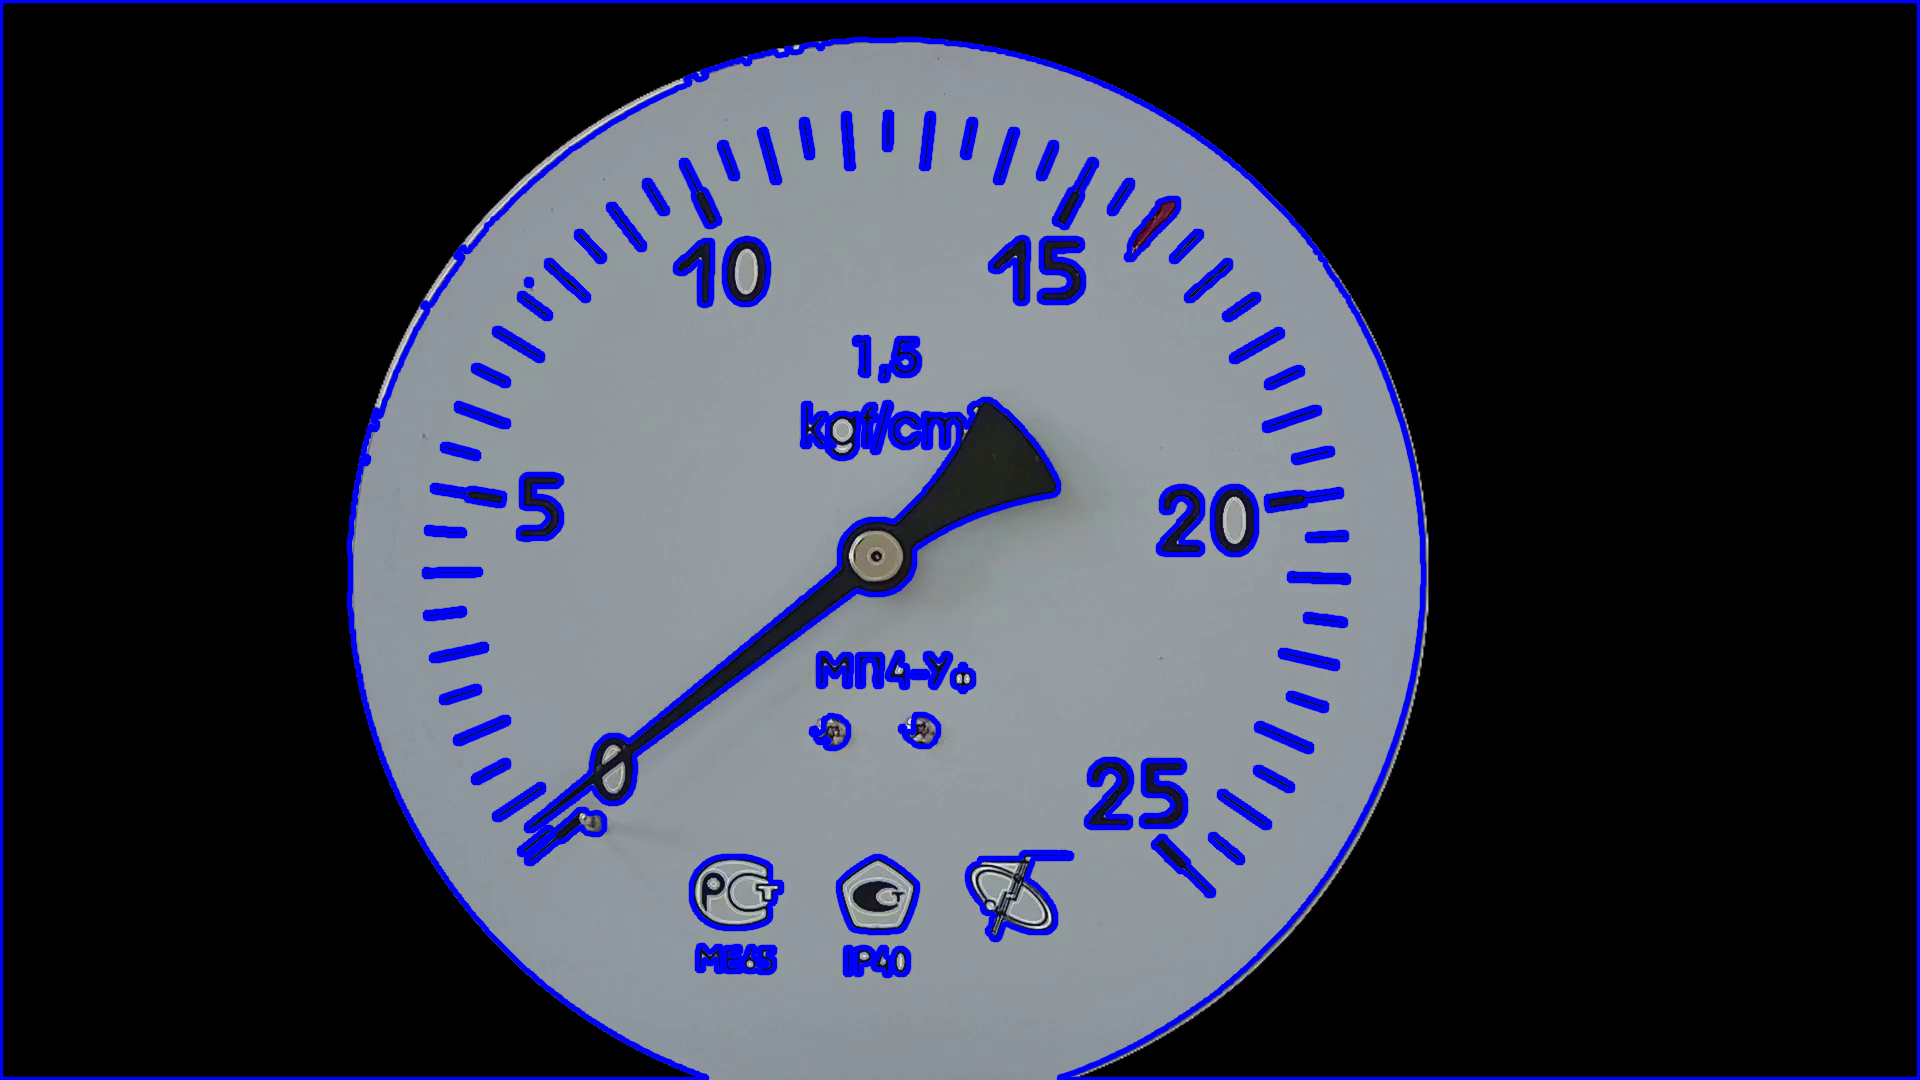

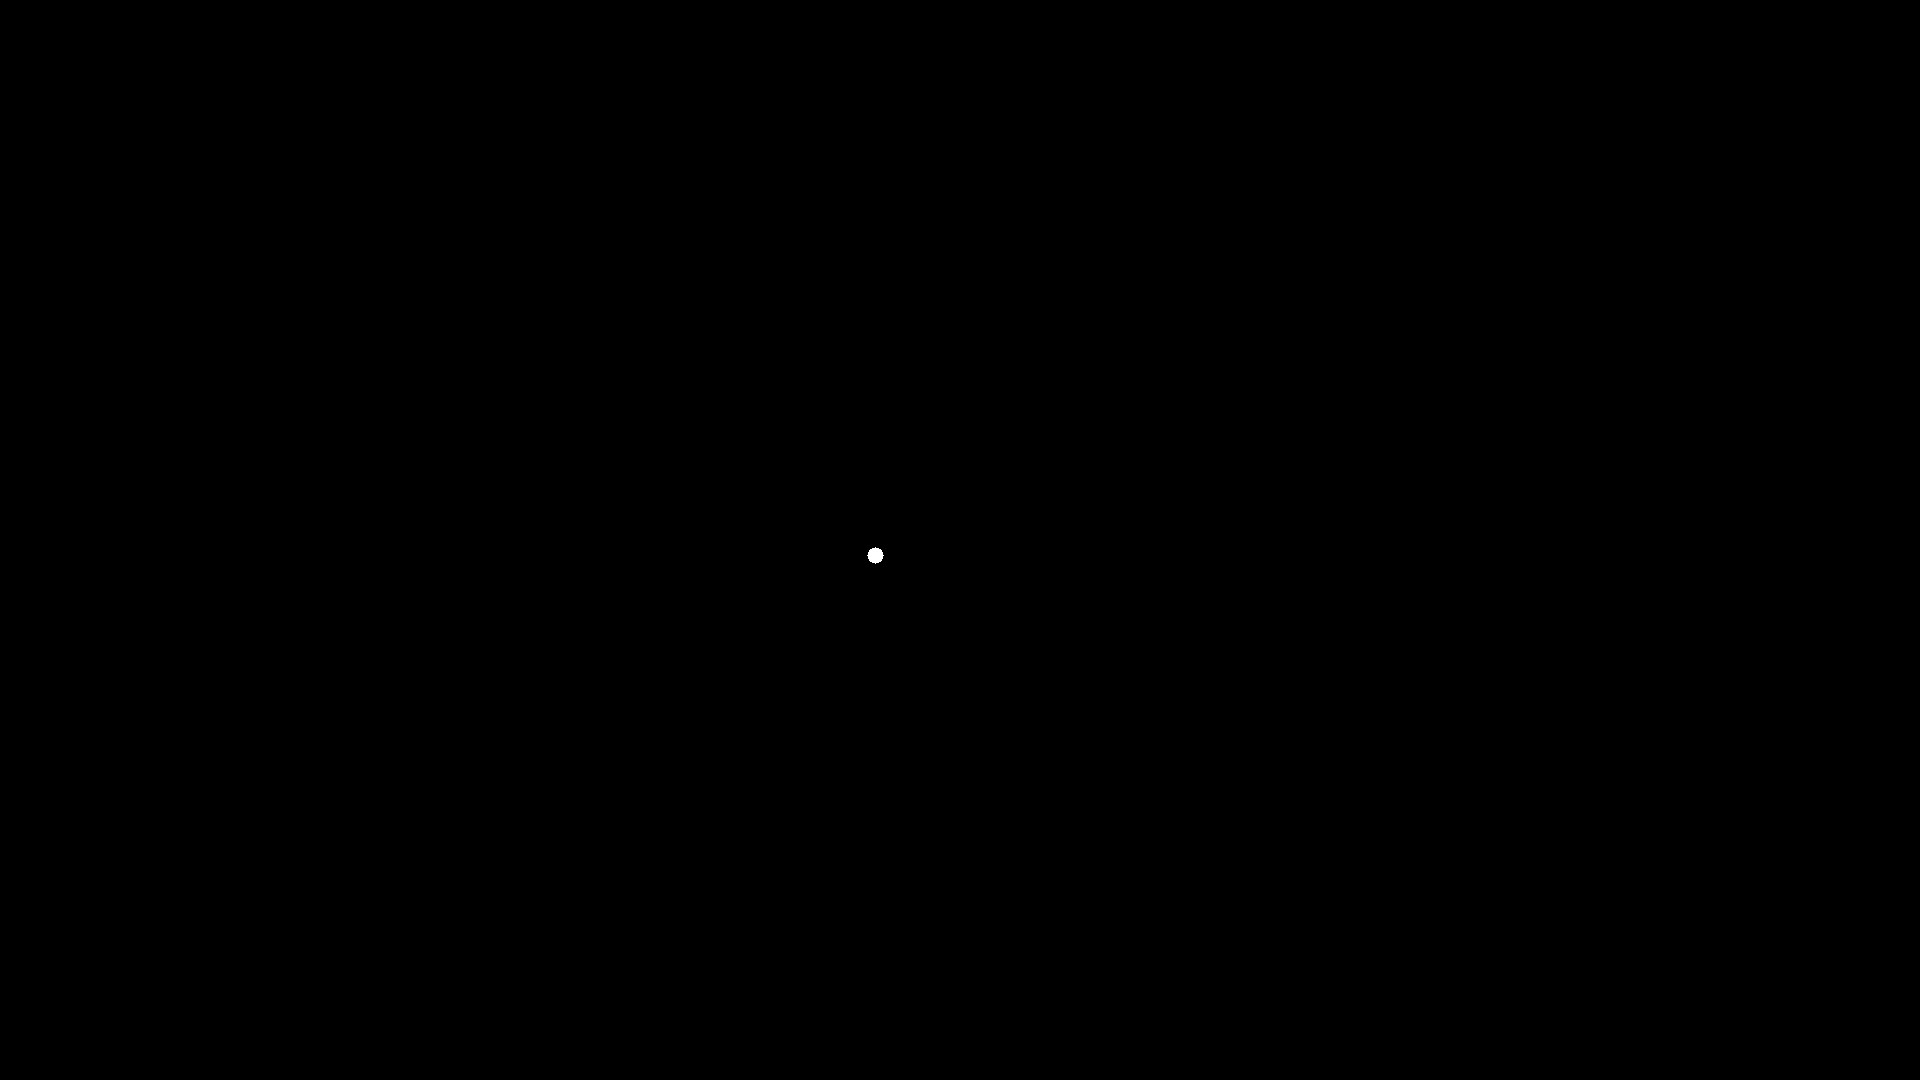

ellipse mask


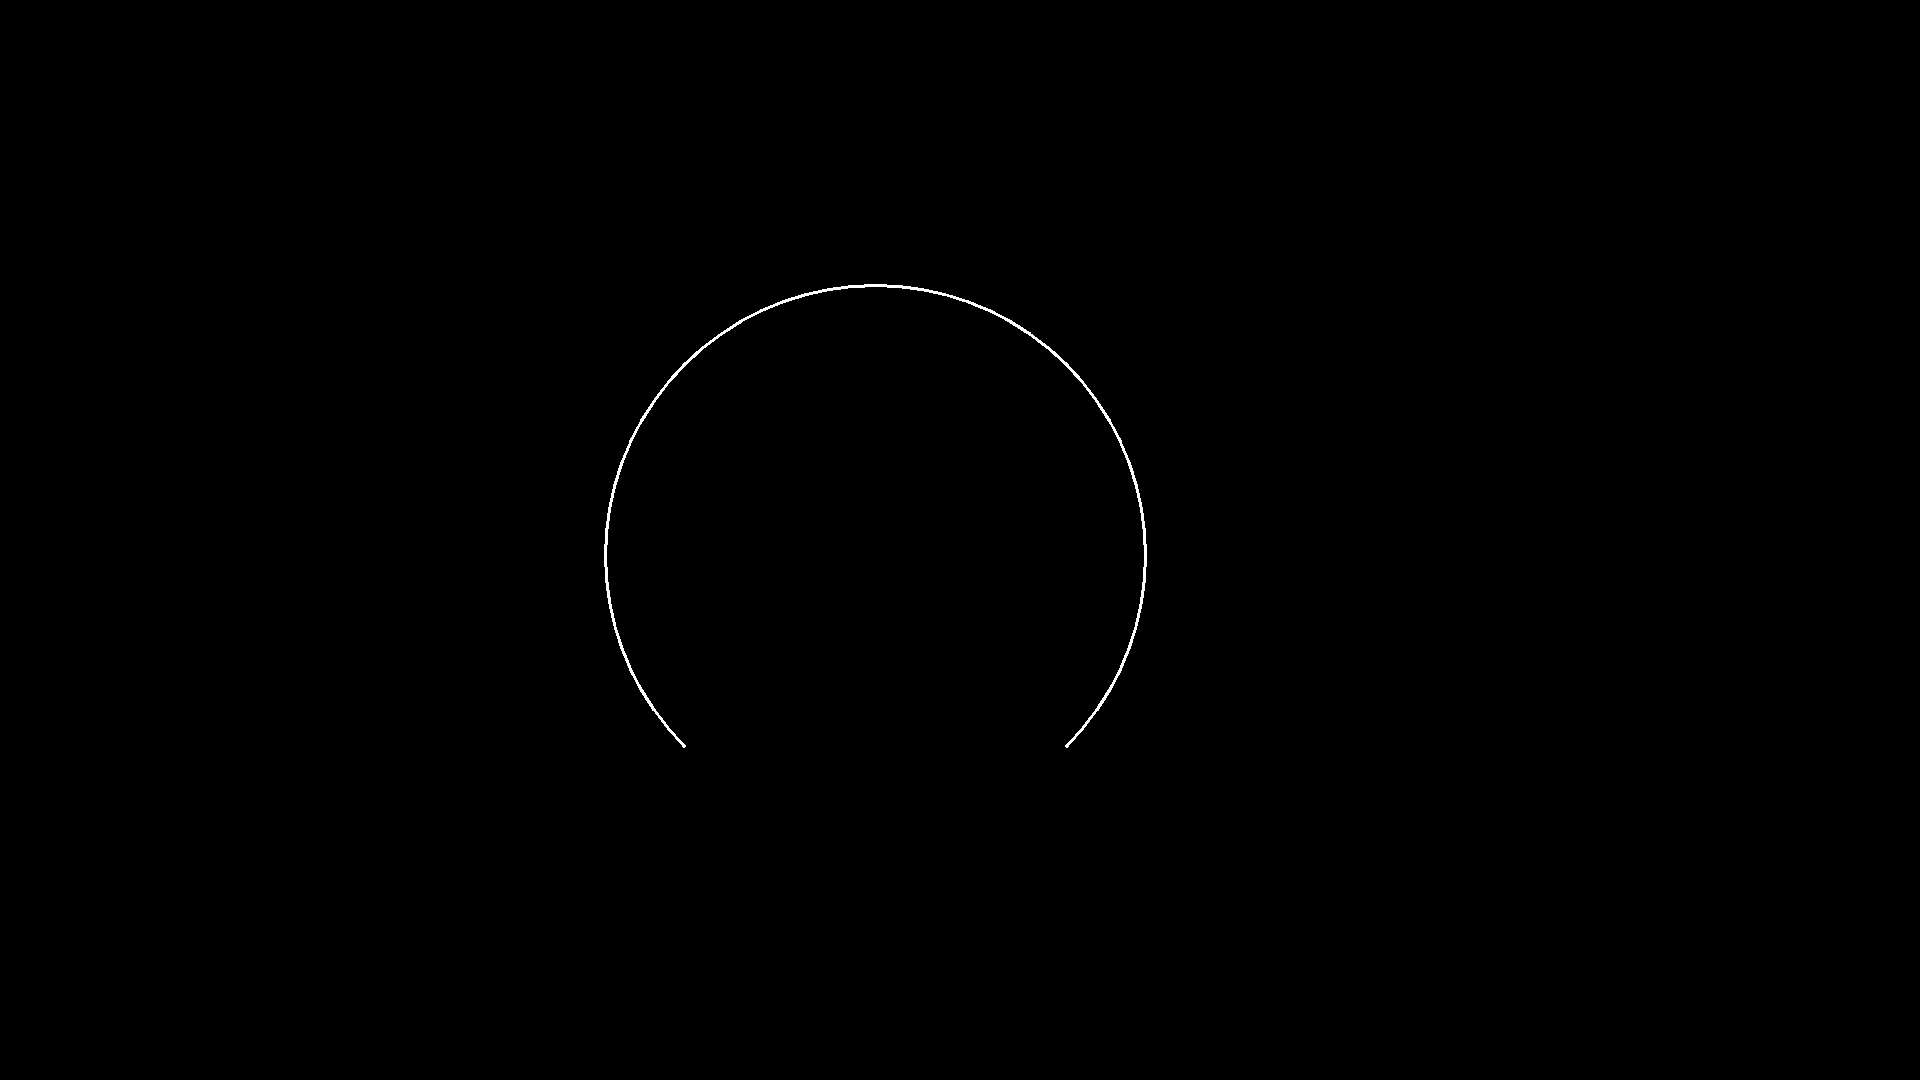

ellipse on image


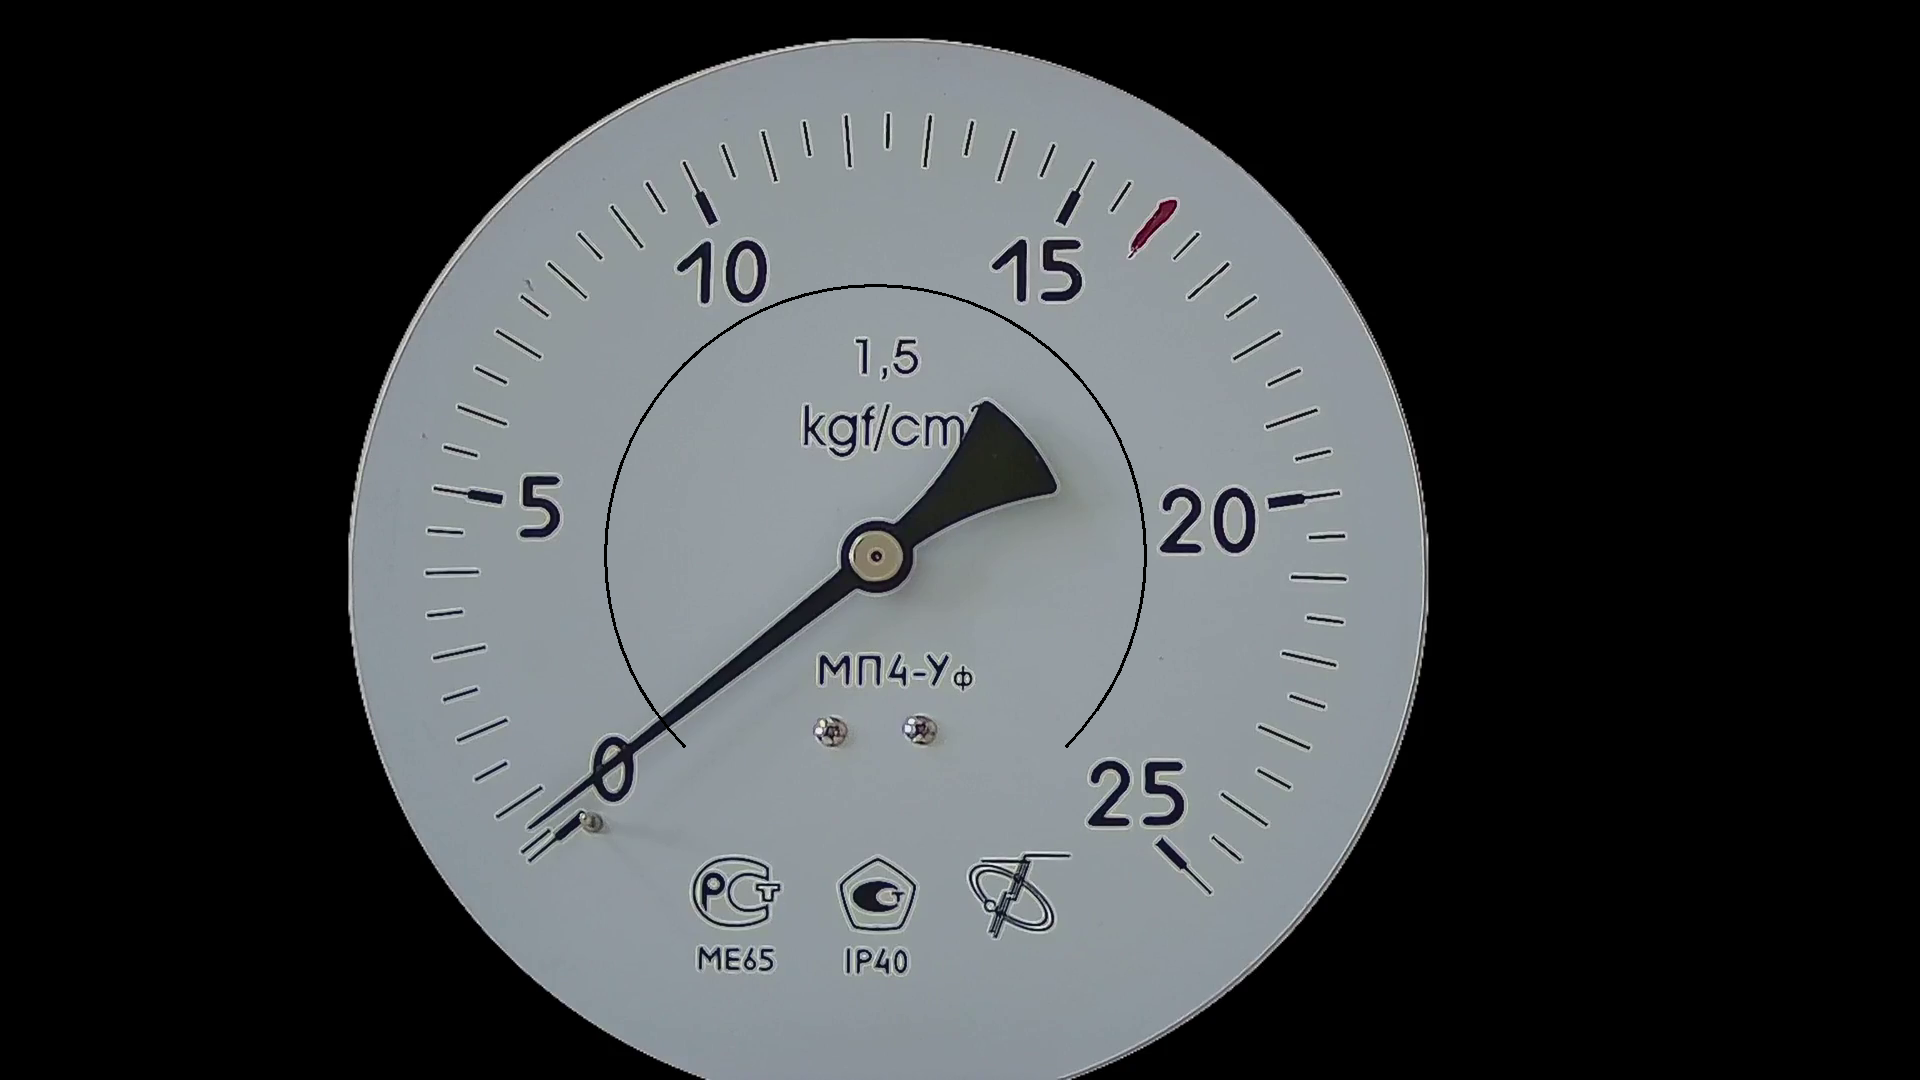

ellipse1


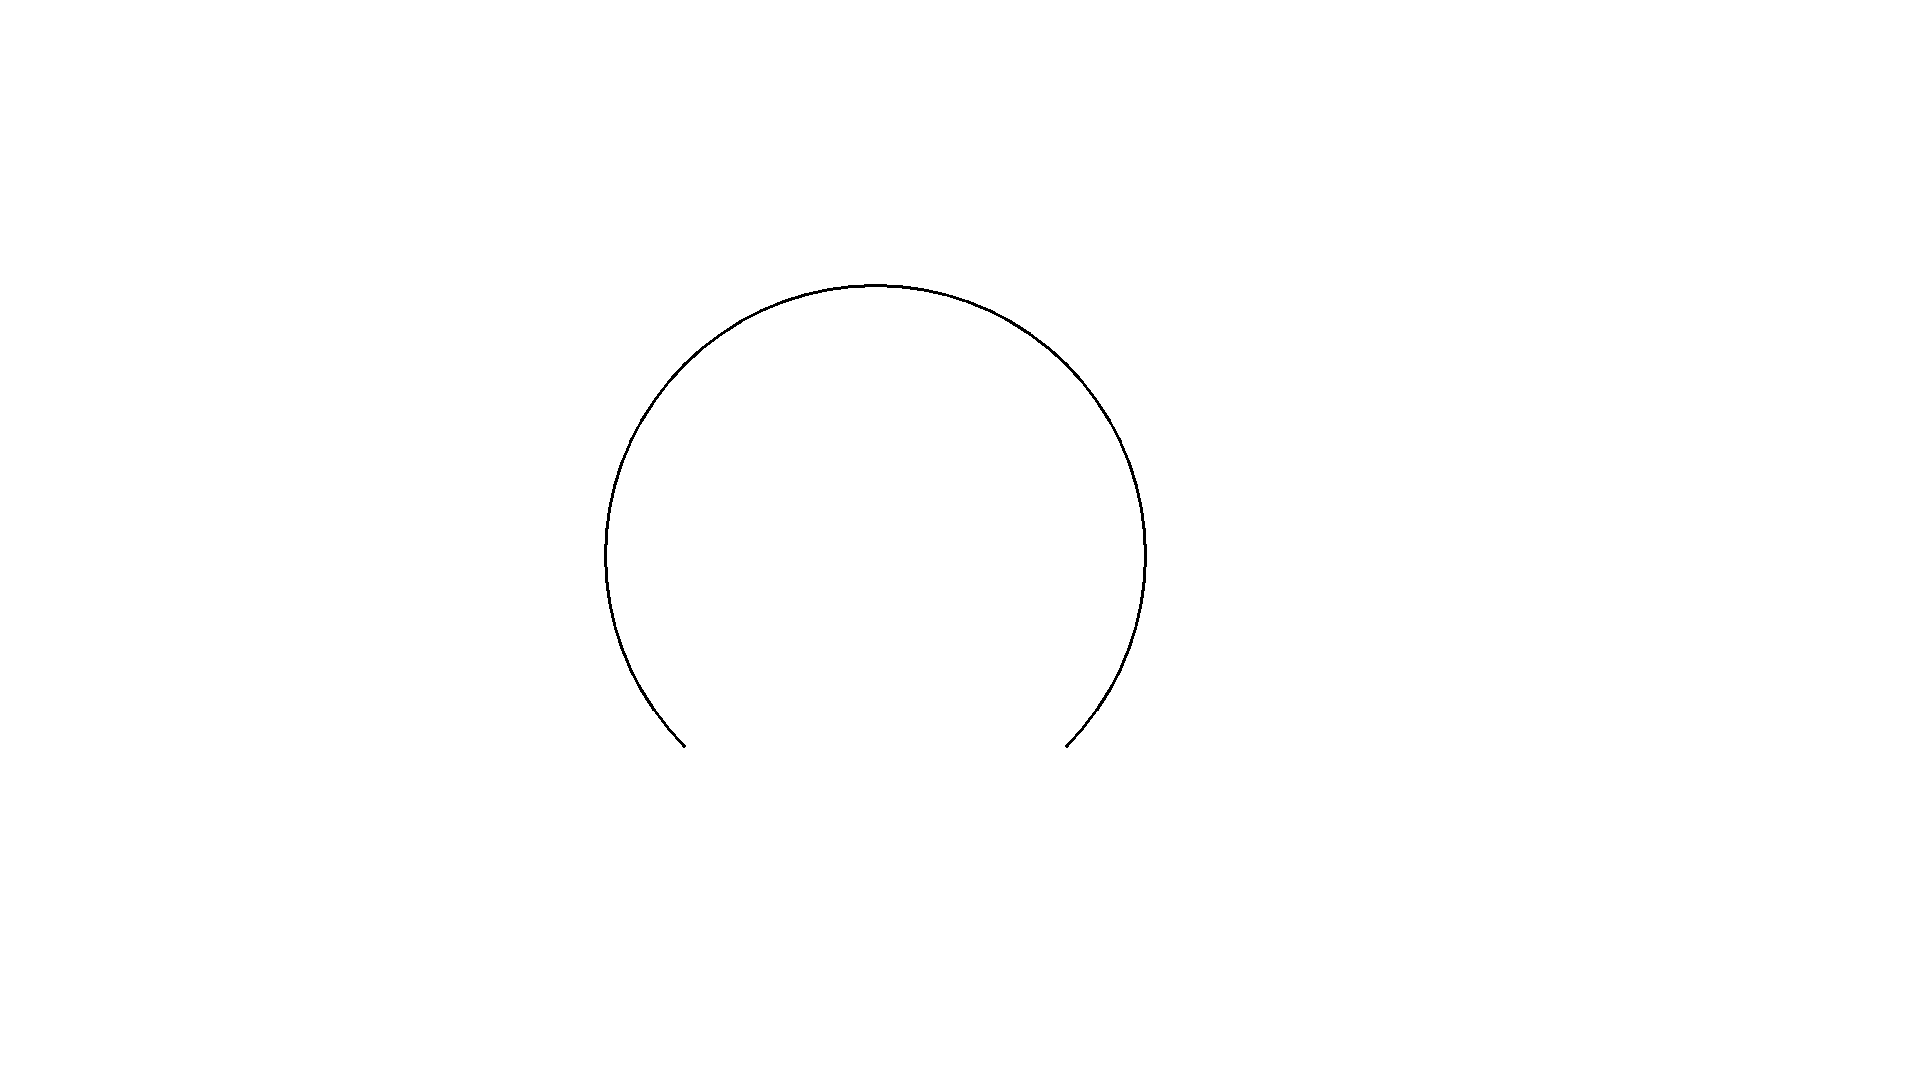

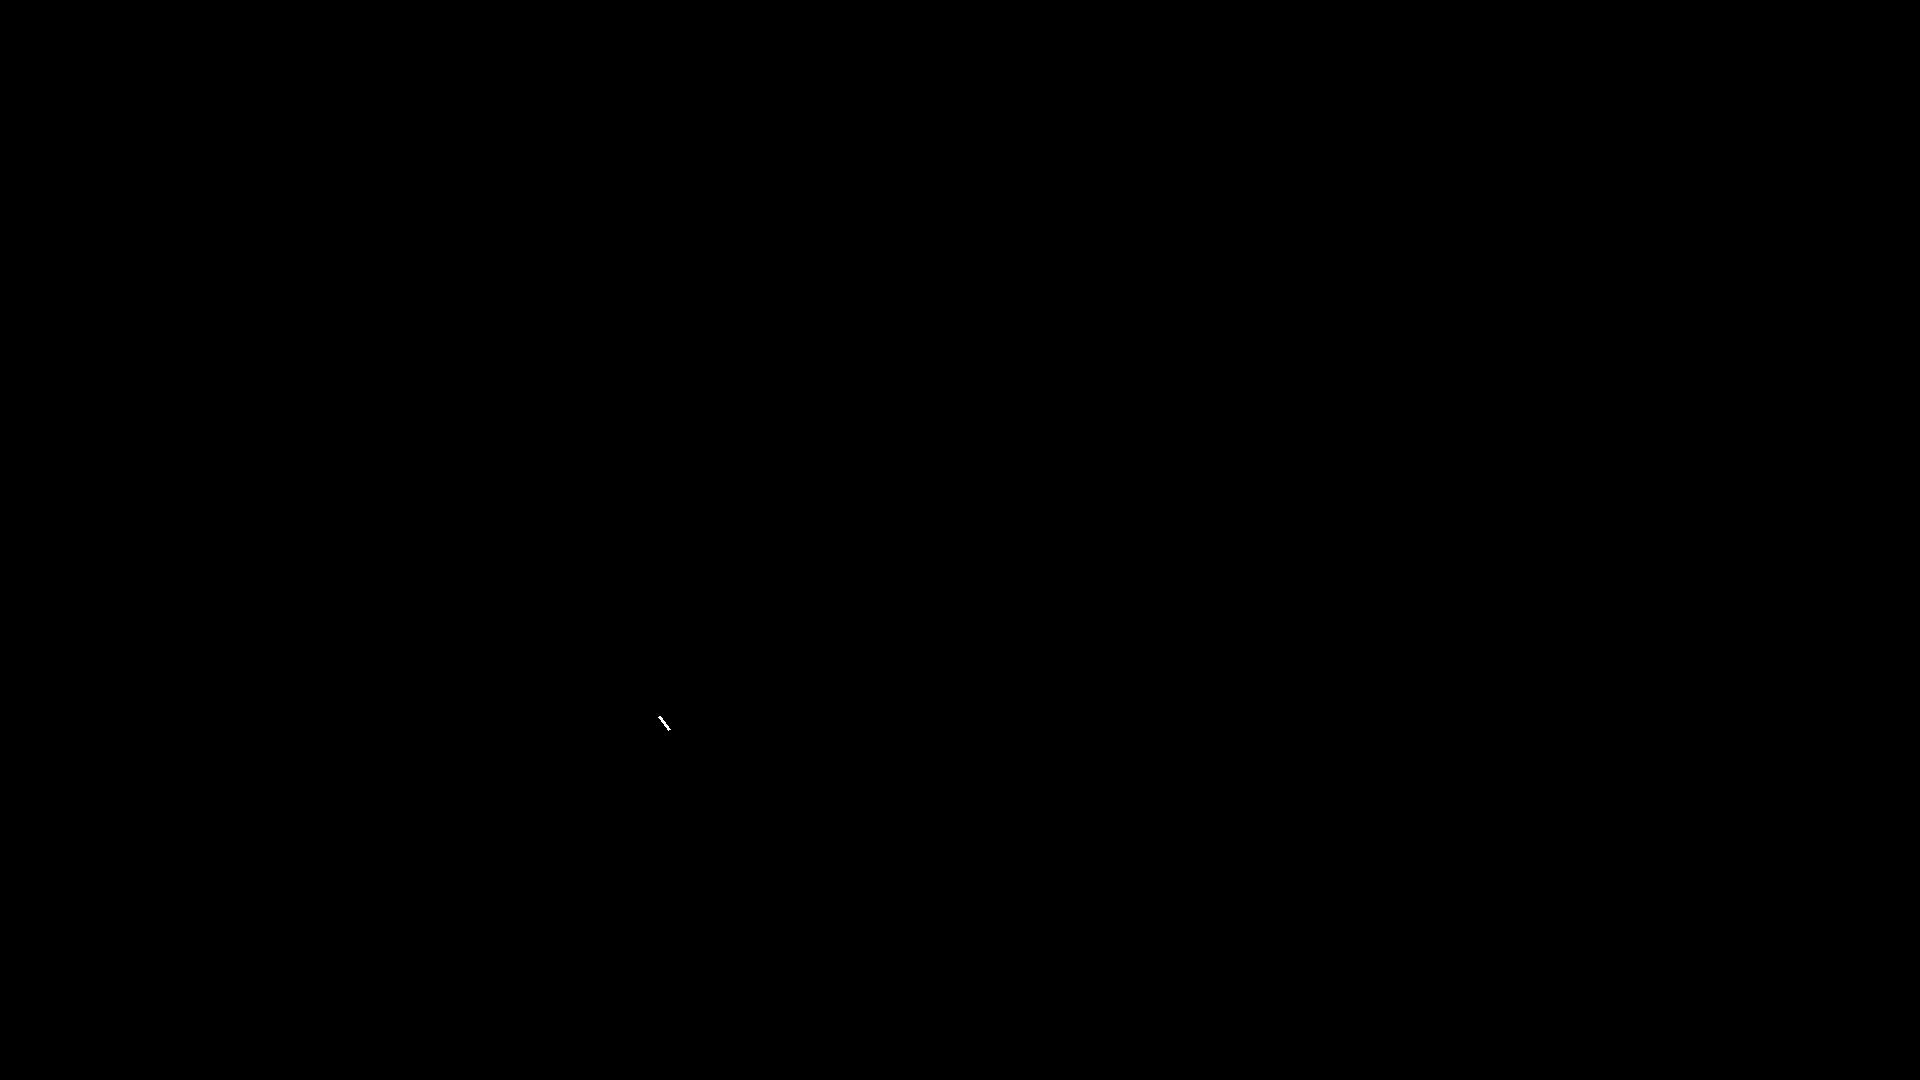

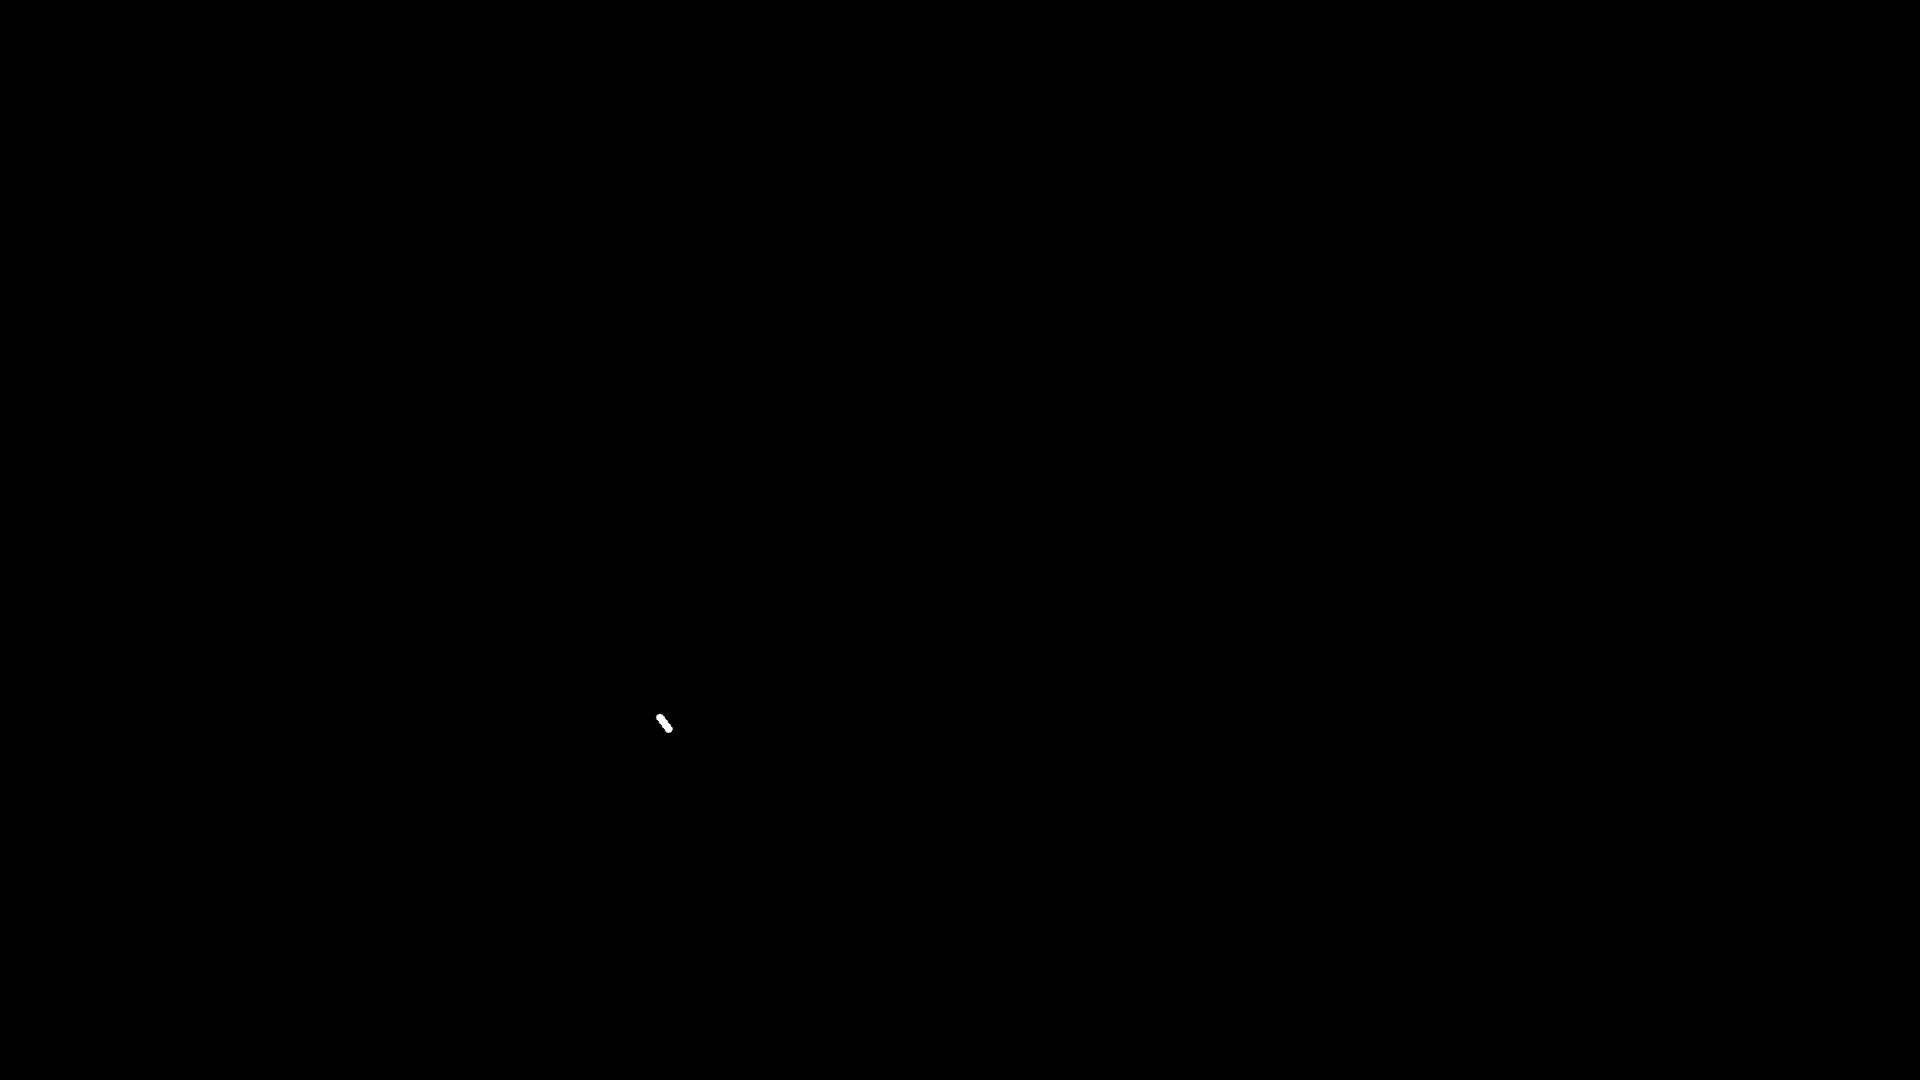

EllipseOnImage


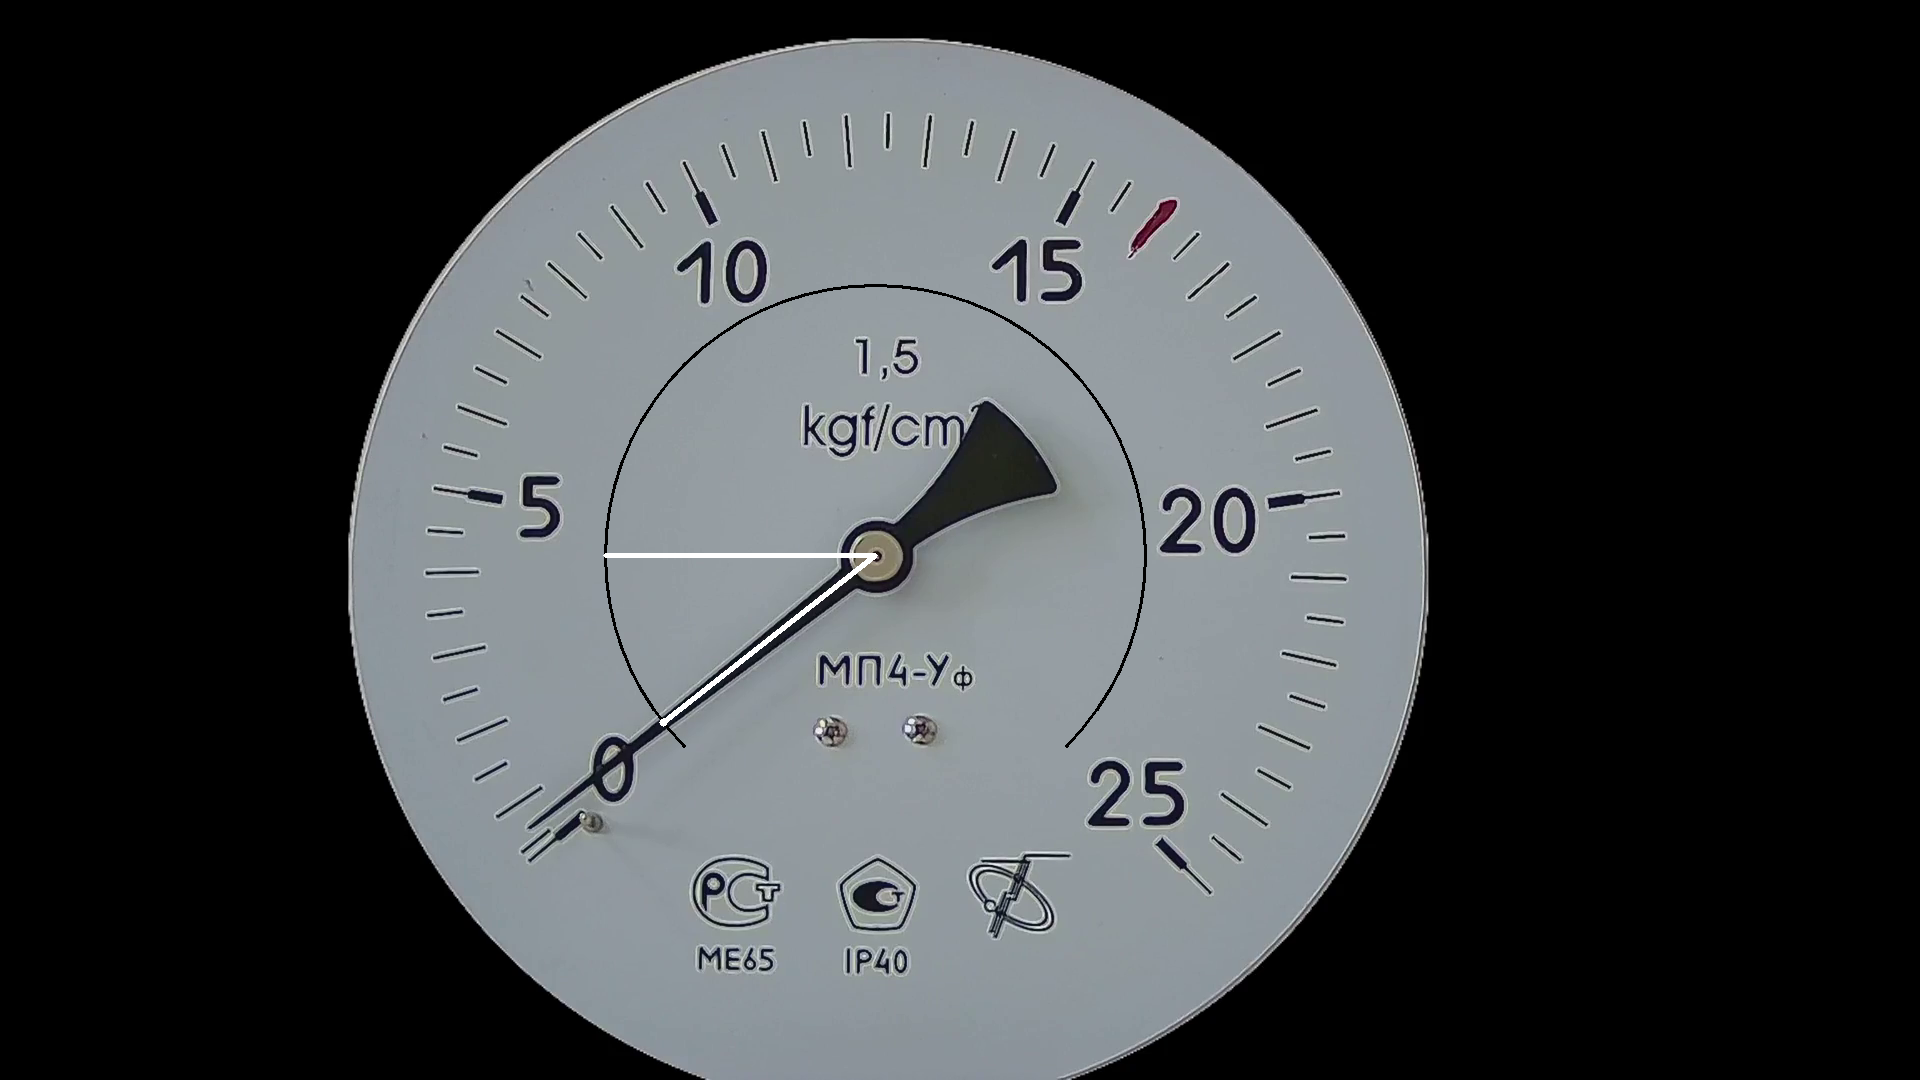

Result: 
Angle: -38.22877174832677 degrees


True

In [ ]:
import numpy as np
import cv2
import math
from google.colab.patches import cv2_imshow
import random as rng
rng.seed(12345)






image = cv2.imread("/content/манометры/im000.png")
EllipseOnImage= image.copy()
cv2_imshow(image)
cv2.waitKey(0)

(h, w) = image.shape[:2]


#image=cv2.rotate(image,cv2.ROTATE_90_CLOCKWISE)
hsvFrame = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
 
lower = np.array([0,0,0], np.uint8)
upper = np.array([255, 255, 102], np.uint8)
mask = cv2.inRange(hsvFrame, lower, upper)
kernel = np.ones((5, 5), 'uint8')

mask = cv2.dilate(mask, kernel, iterations=1)
cv2_imshow( mask)
# ищем контуры и складируем их в переменную contours
contours, hierarchy = cv2.findContours( mask.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


# отображаем контуры поверх изображения
cv2.drawContours( image , contours, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy, 1 )
cv2_imshow( image) # выводим итоговое изображение в окно





# Ищем центр контуров
 # Get the moments
mu = [None]*len(contours)
for i in range(len(contours)):
    mu[i] = cv2.moments(contours[i])
# Get the mass centers
mc = [None]*len(contours)
for i in range(len(contours)):
    # add 1e-5 to avoid division by zero
    mc[i] = (mu[i]['m10'] / (mu[i]['m00'] + 1e-5), mu[i]['m01'] / (mu[i]['m00'] + 1e-5))
# Draw contours

drawing = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)

#for i in range( len(contours)):    85 center
color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
#cv2.drawContours(drawing, contours,85, color, 2)
cv2.circle(drawing, (int(mc[85][0]), int(mc[85][1])), 8, (255,255,255), -1)
CenterPoint = (int(mc[85][0]), int(mc[85][1]))


cv2_imshow( drawing)





#создание окна эллипса
imageEllipse = np.zeros((image.shape[0],image.shape[1],3),dtype=np.uint8)
imageEllipse[:]= (255, 255, 255)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
height, width = imageEllipse.shape[0:2]

#дуга 205-270 градусов (чтобы не налазила на шкалу)
radius1_1 = 270
radius1_2 = 270
moment = cv2.moments(contours[0])
#  85 контур даёт центральную точку
center1 = (int(mc[85][0]), int(mc[85][1])) 
axes1 = (radius1_1, radius1_2)
angle1 = 0
startAngle1 = 135
endAngle1 = 405
thickness1 = 2



cv2.ellipse(imageEllipse, center1, axes1, angle1, startAngle1, endAngle1, BLACK, thickness1)

cv2.ellipse(EllipseOnImage, center1, axes1, angle1, startAngle1, endAngle1, BLACK, thickness1)


imageEllipse1 = cv2.cvtColor(imageEllipse, cv2.COLOR_BGR2GRAY)

imageEllipse2 = cv2.threshold(imageEllipse1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
print('ellipse mask')
cv2_imshow( imageEllipse2)
print('ellipse on image')
cv2_imshow( EllipseOnImage)
print('ellipse1')
cv2_imshow( imageEllipse1)
#Находим пересечение стрелки и нашёй дуги для послудующего определения угла

res1 = cv2.bitwise_and(mask, imageEllipse2)
cv2_imshow( res1)
contours2, hierarchy2 = cv2.findContours( res1, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
view = res1.copy()
cv2.drawContours( view , contours2, -1, (255,0,0), 3, cv2.LINE_AA, hierarchy2, 1 )
cv2_imshow(view)
#Ищем центр контура(точку пересечения стрелки и дуги для определения угла)




MU = [None]*len(contours2)
MU[0] = cv2.moments(contours2[0])
# Get the mass centers
MC = [None]*len(contours2)
# add 1e-5 to avoid division by zero
MC[0] = (MU[0]['m10'] / (MU[0]['m00'] + 1e-5), MU[0]['m01'] / (MU[0]['m00'] + 1e-5))
color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
cv2.drawContours(view, contours2,-1, color, 2)
cv2.circle(EllipseOnImage, (int(MC[0][0]), int(MC[0][1])), 4, (255,255,255), -1)
AnglePoint = (int(MC[0][0]), int(MC[0][1]))
#Высчитываем угол
Angle = math.atan2(CenterPoint[1] - AnglePoint[1] ,CenterPoint[0] - AnglePoint[0])
result = np.degrees([Angle.real])[0]
#Нарисуем угол
cv2.line(EllipseOnImage,(AnglePoint[0],AnglePoint[1]),(CenterPoint[0],CenterPoint[1]),(255,255,255),4)
cv2.line(EllipseOnImage,(CenterPoint[0]-radius1_1,CenterPoint[1]),(CenterPoint[0],CenterPoint[1]),(255,255,255),4)
print('EllipseOnImage')
cv2_imshow(EllipseOnImage)
# display image properties
print("Result: ")
print("width: {} pixels".format(w))
print("height: {} pixels".format(h))
print("Angle: {} degrees".format(result))
cv2.imwrite("/content/манометры/im001.png", EllipseOnImage)

4 - ellipse mask


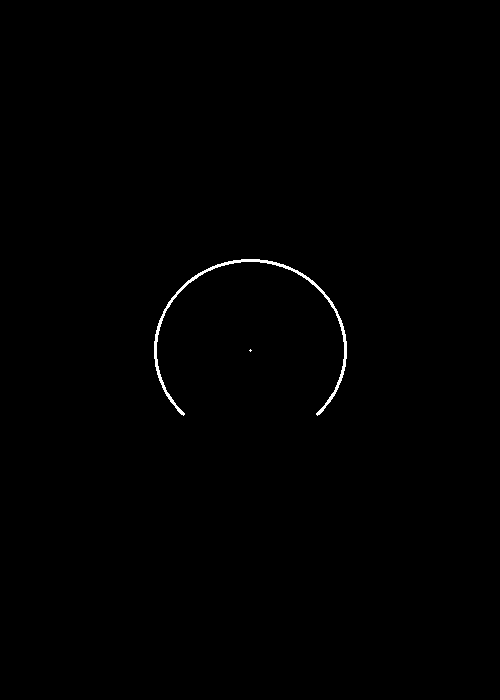

ellipse1


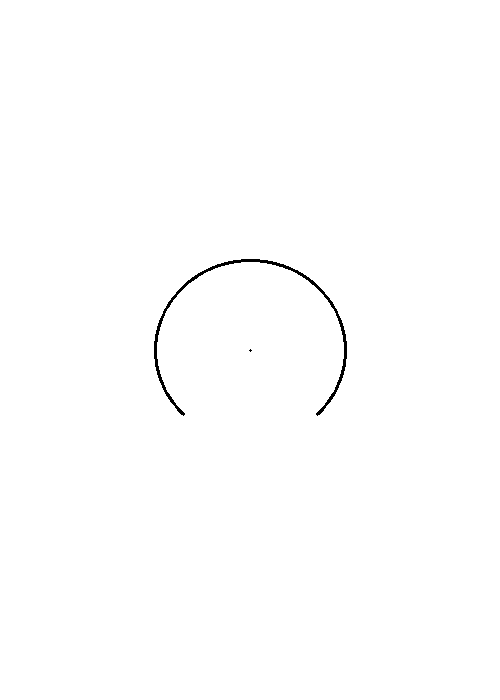

In [ ]:
import cv2
import numpy as np

#создание окна эллипса
imageEllipse = np.zeros((700, 500, 3), np.uint8)
imageEllipse[:] = (255,255,255)
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)
height, width = imageEllipse.shape[0:2]

#дуга 205-270 градусов (чтобы не налазила на шкалу)
radius1_1 = 95
radius1_2 = 90
center1 = (int(width/2), int(height/2))
axes1 = (radius1_1, radius1_2)
angle1 = 0
startAngle1 = 135
endAngle1 = 405
thickness1 = 2

#дуга 270-340 градусов
radius2_1 = 85
radius2_2 = 90
center2 = (int(width/2), int(height/2))
axes2 = (radius2_1, radius2_2)
angle2 = 0
startAngle2 = 0
endAngle2 = 0
thickness2 = 2 # When thickness == -1 -> Fill shape

cv2.ellipse(imageEllipse, center1, axes1, angle1, startAngle1, endAngle1, BLACK, thickness1)
cv2.ellipse(imageEllipse, center2, axes2, angle2, startAngle2, endAngle2, BLACK, thickness2)

imageEllipse1 = cv2.cvtColor(imageEllipse, cv2.COLOR_BGR2GRAY)

imageEllipse2 = cv2.threshold(imageEllipse1, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
print('4 - ellipse mask')
cv2_imshow( imageEllipse2)
print('ellipse1')
cv2_imshow( imageEllipse1)